In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df =pd.read_csv('./Algerian_forest_fires_dataset_cleaned.csv')

In [47]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01,Low,Low
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,2012-06-02,Low,Low
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03,Low,Low
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,2012-06-04,Low,Low
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,2012-06-05,Low,Low


### Checking for NULL values

In [48]:
df.isna().sum()

Unnamed: 0     0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
date           0
FWI_hazard     0
FFMC_hazard    0
dtype: int64

In [76]:
df['FWI'].fillna(df['FWI'].mean(), inplace=True)

In [77]:
df['FWI'].isna().sum()

0

In [78]:
df_new = df.drop(columns=['Unnamed: 0','date', 'FWI_hazard', 'FFMC_hazard'], axis=1)

In [79]:
df_new.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
222,9,9,2012,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,1,0.0
54,25,7,2012,31,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,1,1.0
70,10,8,2012,35,55,14,0.0,88.9,18.6,67.0,7.4,21.9,11.6,1,1.0
48,19,7,2012,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,1,1.0
76,16,8,2012,36,61,18,0.3,80.2,11.7,90.4,2.8,17.6,4.2,1,1.0


In [80]:
df_new.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 28.7 KB


### MODEL BUILDING

In [82]:
X = df_new.drop('Temperature', axis=1)

y = df_new['Temperature']

In [83]:
X.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Standardize/Feature Scaling the Features

In [86]:
from sklearn.preprocessing import StandardScaler


In [87]:
scaler = StandardScaler()

In [88]:
X_train = scaler.fit_transform(X_train)

In [89]:
X_test = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
print(model.coef_)
# coefficents calculated by the model

[-6.29946839e-01 -3.30806923e-01  5.55111512e-16 -9.68152302e-01
 -5.57690535e-01  2.36452852e-01  1.90585623e+00  9.33805925e-01
  1.17296981e+00  4.45810030e-02 -1.35995788e+00  1.97724938e-01
 -2.52309217e-01 -8.34562604e-02]


In [94]:
print(model.intercept_)

## Intercept derived using Linear Regression

31.98159509202454


- Predicting the values

In [96]:
predictions =  model.predict(X_test)

### verifying the assumptions

1. Linearity

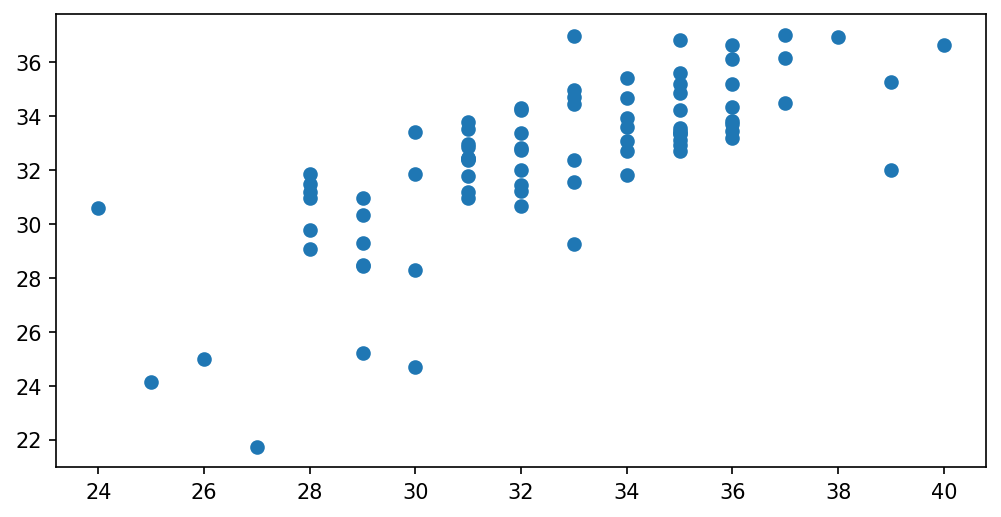

In [97]:
plt.figure(figsize=(8,4), dpi=150)

plt.scatter(y_test, predictions)

## TRUTH POINT VS PREDICTED POINT should be LINEAR

2. Normal Distribution

<AxesSubplot:xlabel='Residuals(error)', ylabel='Density'>

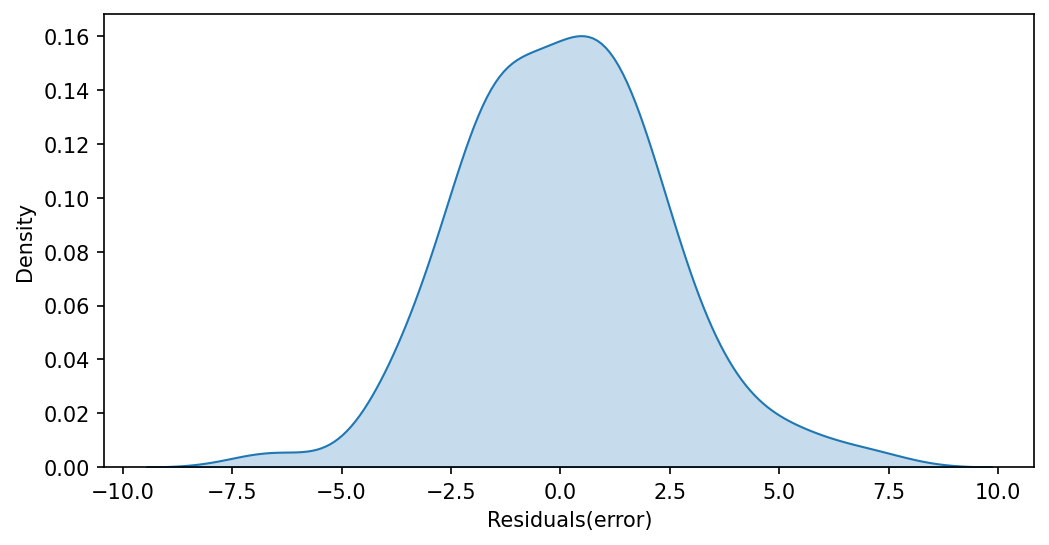

In [101]:
## CALCULATING RESIDUALS

residuals = y_test - predictions


plt.figure(figsize=(8,4), dpi=150)

# sns.displot(residuals, kde=True)

plt.xlabel('Residuals(error)')

sns.kdeplot(residuals, shade=True)

## DISTRUBUTION of RESIDUALS should be NORMAL

3. Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Predicted Values', ylabel='Residuals (error)'>

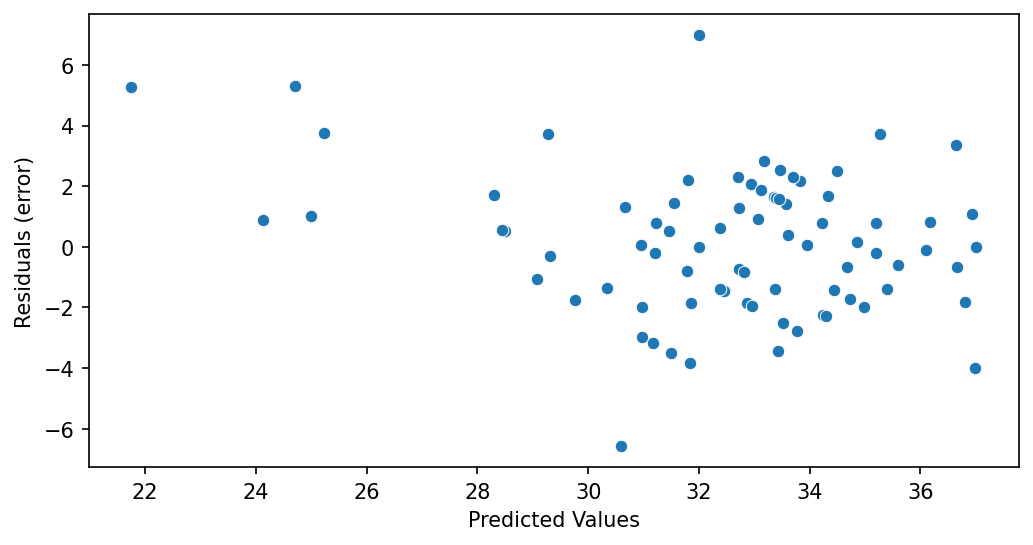

In [100]:
plt.figure(figsize=(8,4), dpi=150)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals (error)')

sns.scatterplot(predictions, residuals)

## THIS DISTRIBUTION IS CALLED UNIFORM DISTRIBUTION (NO SHAPE)

## HOMESCEDASTICITY

### PERFORMANCE METRICS

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- MSE

In [103]:
mse = mean_squared_error(y_test, predictions)

mse

5.2413564324638084

- MAE

In [104]:
mae = mean_absolute_error(y_test, predictions)

mae

1.8039509555052624

- RMSE

In [105]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

rmse

2.2894008894171

- R SQUARE

In [106]:
r_score = r2_score(y_test, predictions)

r_score

0.512011642494749

- ADJUSTED R SQUARE

In [107]:
adjusted_r_score = 1 - (1-r_score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adjusted_r_score

0.4084989605996957

In [123]:
col = ['MSE', 'MAE', 'RMSE', 'R SQUARE', 'ADJUSTED R']
vals = [mse, mae, rmse, r_score, adjusted_r_score]

performance = pd.DataFrame({'Metrics':col,'Linear Reg':vals})

performance

,Metrics,Linear Reg
0,MSE,5.241356
1,MAE,1.803951
2,RMSE,2.289401
3,R SQUARE,0.512012
4,ADJUSTED R,0.408499


# __RIDGE REGRESSION__

### MODEL BUILDING

In [111]:
from sklearn.linear_model import RidgeCV

In [112]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,5.0,10), scoring='neg_mean_absolute_error')

In [113]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [115]:
# optimal value of alpha is

print(ridge_cv_model.alpha_)

10.0


In [117]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [118]:
ridge_predictions = ridge_cv_model.predict(X_test)

### Veryfying Assumptions

1. Linearity

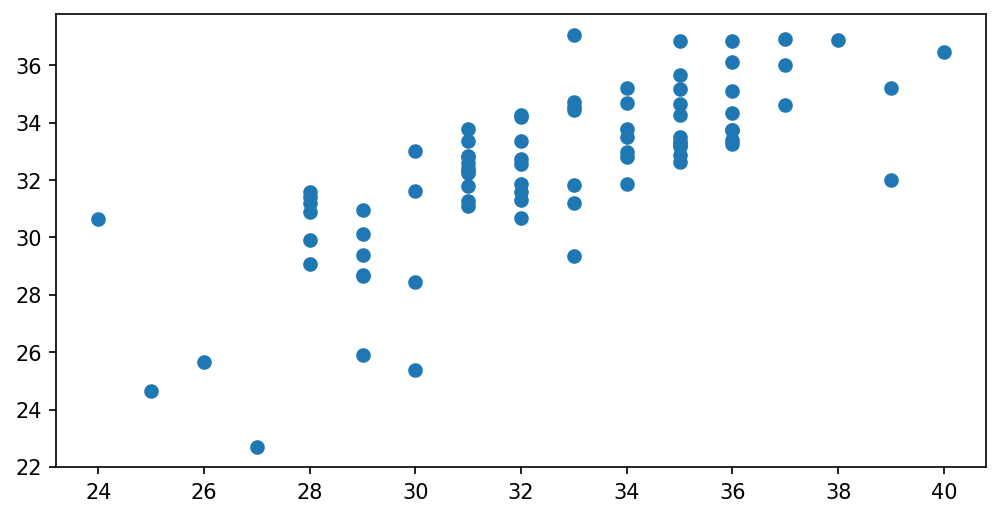

In [119]:
plt.figure(figsize=(8,4), dpi=150)

plt.scatter(y_test, ridge_predictions)

## TRUTH POINT VS PREDICTED POINT should be LINEAR

2. Normal Distribution of Residuals

<AxesSubplot:xlabel='Residuals(error)', ylabel='Density'>

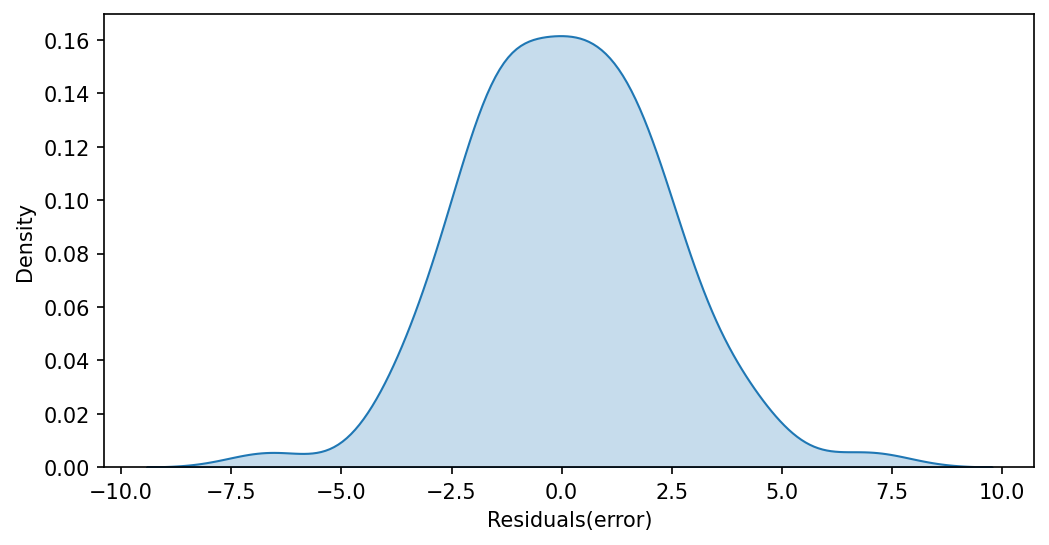

In [120]:
## CALCULATING RESIDUALS

residuals_ridge = y_test - ridge_predictions


plt.figure(figsize=(8,4), dpi=150)

# sns.displot(residuals, kde=True)

plt.xlabel('Residuals(error)')

sns.kdeplot(residuals_ridge, shade=True)

## DISTRUBUTION of RESIDUALS should be NORMAL

3. Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Predicted Values', ylabel='Residuals (error)'>

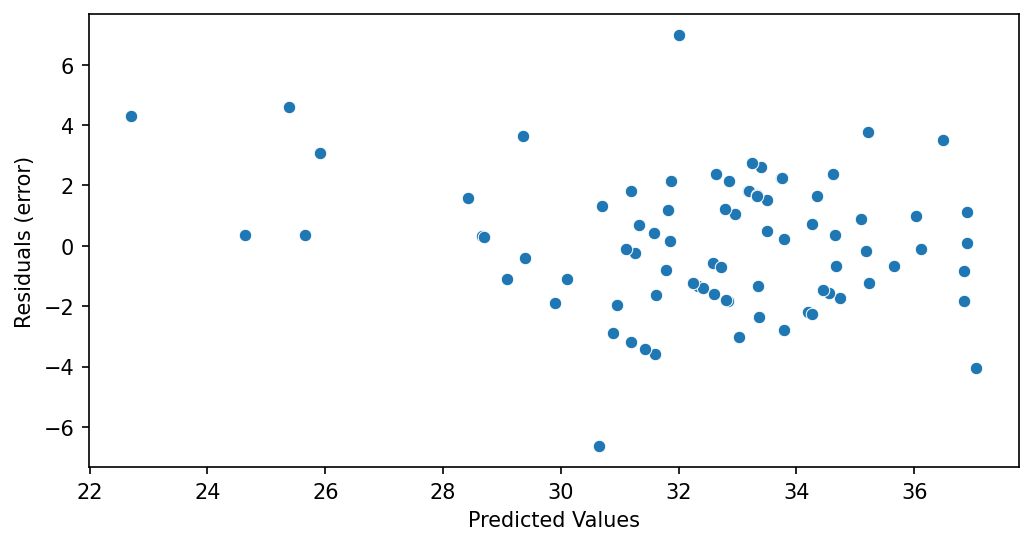

In [121]:
plt.figure(figsize=(8,4), dpi=150)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals (error)')

sns.scatterplot(ridge_predictions, residuals_ridge)

## THIS DISTRIBUTION IS CALLED UNIFORM DISTRIBUTION (NO SHAPE)

## HOMESCEDASTICITY

### Performance Metrics

In [122]:
mse_ridge = mean_squared_error(y_test, ridge_predictions)

mae_ridge = mean_absolute_error(y_test, ridge_predictions)

rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_predictions))

r_score_ridge = r2_score(y_test, ridge_predictions)

adjusted_r_score_ridge = 1 - (1-r_score_ridge) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [126]:
performance['Ridge'] = pd.Series([mse_ridge, mae_ridge, rmse_ridge, r_score_ridge, adjusted_r_score_ridge])

In [127]:
performance

,Metrics,Linear Reg,Ridge
0,MSE,5.241356,4.905147
1,MAE,1.803951,1.756617
2,RMSE,2.289401,2.214757
3,R SQUARE,0.512012,0.543314
4,ADJUSTED R,0.408499,0.446441


# __LASSO REGRESSION__

In [128]:
from sklearn.linear_model import LassoCV

In [129]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [130]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [132]:
# OPTIMIZED ALPHA FOR THIS DATA IS

print(lasso_cv_model.alpha_)

0.2656240026560081


In [133]:
lasso_predictions = lasso_cv_model.predict(X_test)

### Assumptions

1. Linearity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted data')

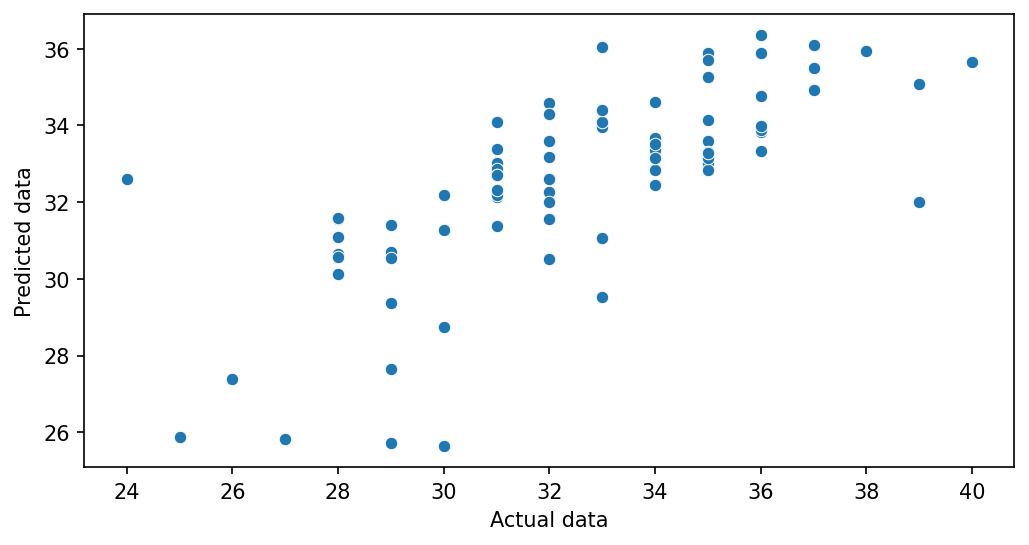

In [134]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(y_test, lasso_predictions)
plt.xlabel("Actual data")
plt.ylabel('Predicted data')

2. Normal Distribution

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

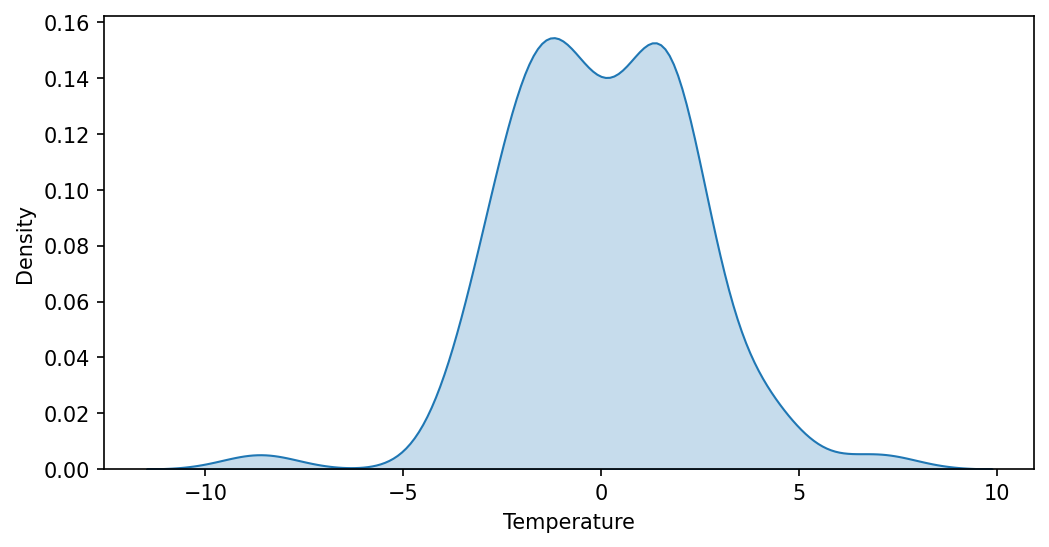

In [135]:
residual_lasso = y_test - lasso_predictions

plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(residual_lasso,shade='True')

3.Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Temperature'>

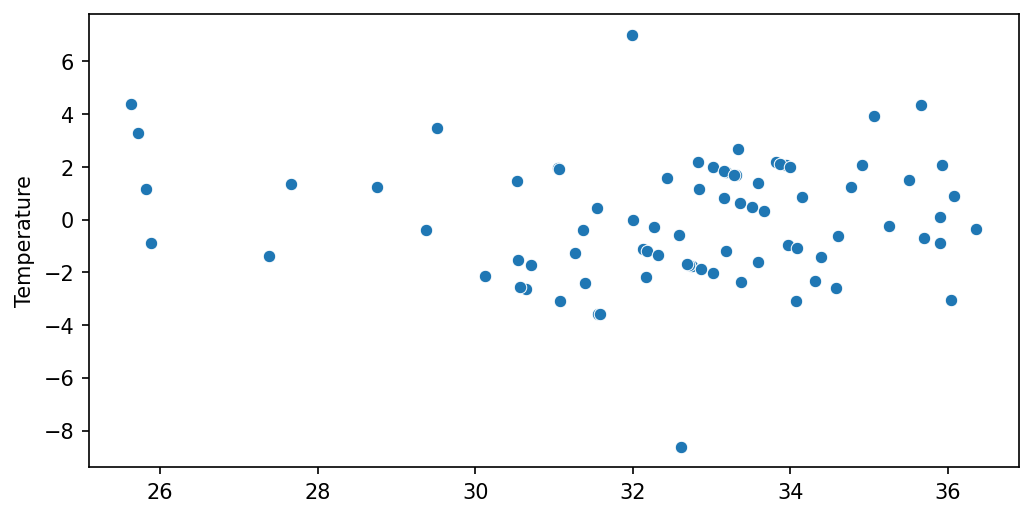

In [136]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(lasso_predictions,residual_lasso)

### Performance Metrics

In [138]:
mse_lasso = mean_squared_error(y_test,lasso_predictions)

mae_lasso  = mean_absolute_error(y_test,lasso_predictions)

rmse_lasso  = np.sqrt(mean_squared_error(y_test,lasso_predictions))

r_score_lasso  = r2_score(y_test,lasso_predictions)

adjusted_r_score_lasso = 1-(1-r_score_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [139]:
print("MSE => ",mean_squared_error(y_test,lasso_predictions))
print("MAE => ",mean_absolute_error(y_test,lasso_predictions))
print("RMSE => ",np.sqrt(mean_squared_error(y_test,lasso_predictions)))

lasso_grid_r_score = r2_score(y_test,lasso_predictions)

lasso_grid_adjusted_r_score = 1-(1-lasso_grid_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"r_square_score => {lasso_grid_r_score}")
print(f"adjusted_r_square_score => {lasso_grid_adjusted_r_score}")

MSE =>  5.246296576067565
MAE =>  1.8438439504913973
RMSE =>  2.2904795515497547
r_square_score => 0.5115516980902612
adjusted_r_square_score => 0.4079414522306196


In [140]:
performance['Lasso'] = pd.Series([mse_lasso, mae_lasso, rmse_lasso, r_score_lasso, adjusted_r_score_lasso])

performance

,Metrics,Linear Reg,Ridge,Lasso
0,MSE,5.241356,4.905147,5.246297
1,MAE,1.803951,1.756617,1.843844
2,RMSE,2.289401,2.214757,2.290480
3,R SQUARE,0.512012,0.543314,0.511552
4,ADJUSTED R,0.408499,0.446441,0.407941


# __ELASTIC NET__

In [141]:
from sklearn.linear_model import ElasticNetCV

In [142]:
# Note : l1_ration represents the alpha from the equation and n_alphas represent the Lammbda from the equation
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], eps=0.001, n_alphas=100, max_iter=1000000)

In [143]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [144]:
elastic_predictions = elastic_model.predict(X_test)

In [147]:
# Best performing l1 ratio is, here for this model 1.0 means it is disregarding ridge completely and going with only lasso regression
print(elastic_model.l1_ratio_)

0.7


In [148]:
print(elastic_model.alpha_)

0.10807238386882818


### Assumptions

1. Linear

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted data')

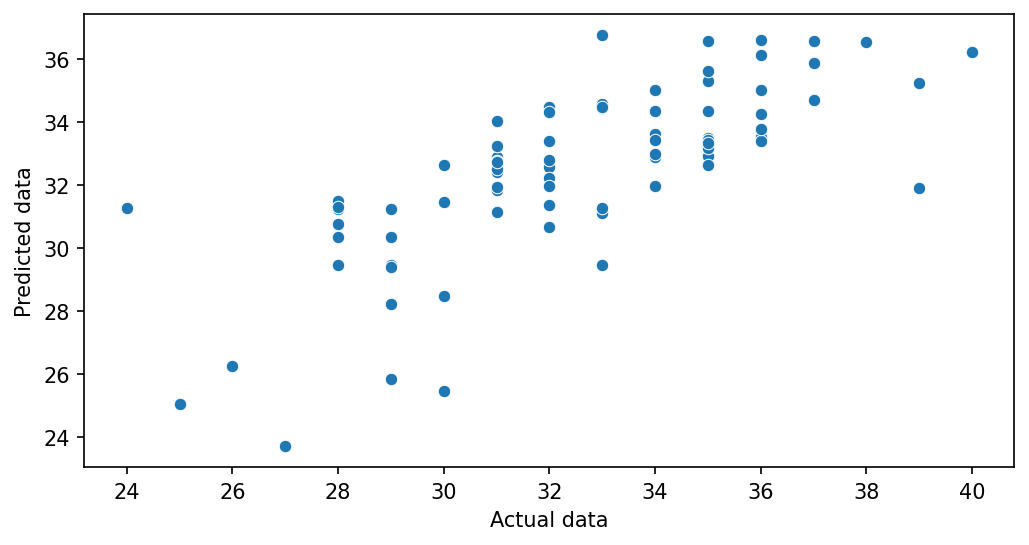

In [149]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(y_test,elastic_predictions)
plt.xlabel("Actual data")
plt.ylabel('Predicted data')

2. Normal Distribution of Residuals

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

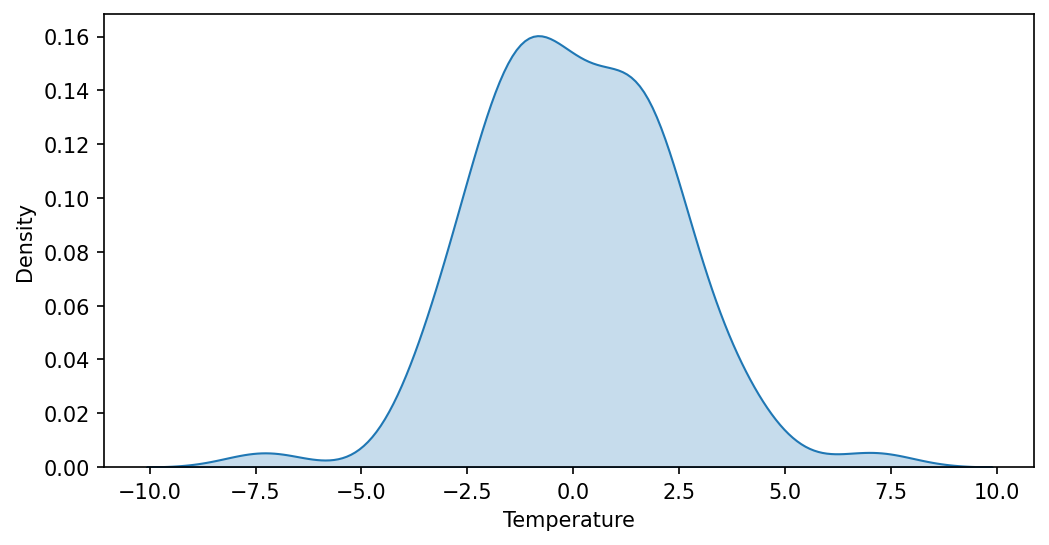

In [150]:
residual_elastic = y_test - elastic_predictions

plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(residual_elastic,shade='True')

3. Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Temperature'>

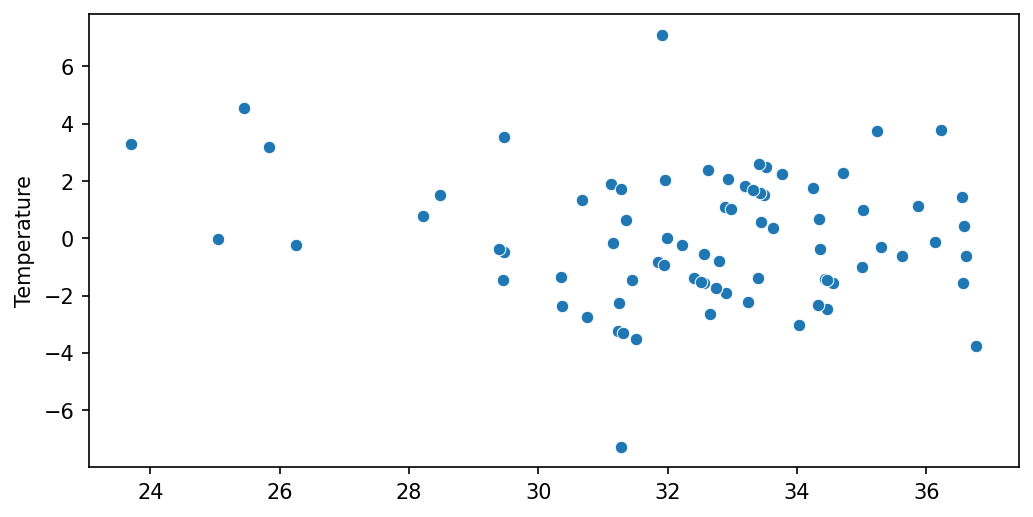

In [151]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(elastic_predictions,residual_elastic)

### Performance Metrics

In [152]:
mse_elastic = mean_squared_error(y_test,elastic_predictions)

mae_elastic  = mean_absolute_error(y_test,elastic_predictions)

rmse_elastic = np.sqrt(mean_squared_error(y_test,elastic_predictions))

r_score_elastic = r2_score(y_test,elastic_predictions)

adjusted_r_score_elastic = 1-(1-r_score_elastic)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [153]:
performance['Elastic'] = pd.Series([mse_ridge, mae_elastic, rmse_elastic, r_score_elastic, adjusted_r_score_elastic])

performance

,Metrics,Linear Reg,Ridge,Lasso,Elastic
0,MSE,5.241356,4.905147,5.246297,4.905147
1,MAE,1.803951,1.756617,1.843844,1.781483
2,RMSE,2.289401,2.214757,2.290480,2.228729
3,R SQUARE,0.512012,0.543314,0.511552,0.537534
4,ADJUSTED R,0.408499,0.446441,0.407941,0.439435
